In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm

In [2]:
'''DATA PRE-PROCESS'''


df = pd.read_csv("WineQT.csv")
print(df)
#drop the un-related row that marked the id of the wine
dfy = df['quality']
#drop the un-related and target rows
dfX = df.drop(columns = ["Id","quality"])

oversampler = RandomOverSampler(random_state = 42,sampling_strategy = {3:350,4:370,7:420})

def max_abs_scale(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

#normalize the data based on the maximum absolute value scaling
dfX = max_abs_scale(dfX)

X_resampled, y_resampled = oversampler.fit_resample(dfX, dfy)

#convert pandas dataframe to numpy array
X = X_resampled.to_numpy()
y = y_resampled.to_numpy()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

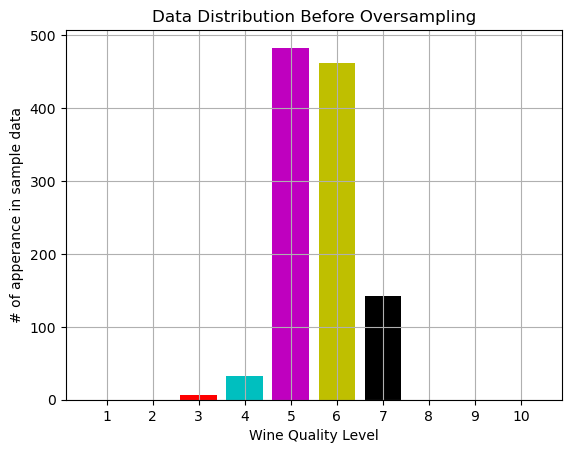

In [3]:
#bar diagram of sample distribution before resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in dfy.to_numpy():
        if j == i:
            count += 1
    y_axis.append(count)
    
colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

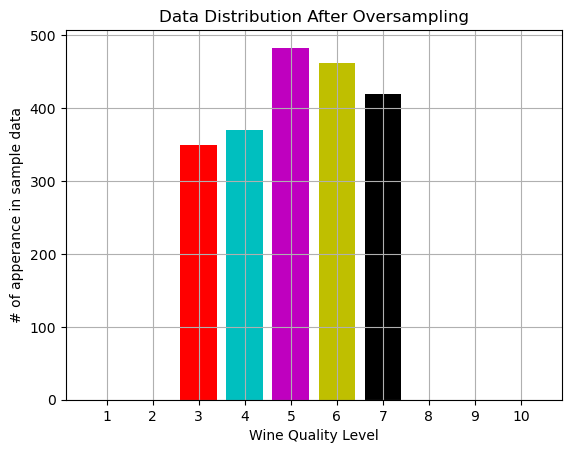

In [4]:
#bar diagram of sample distribution after resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in y:
        if j == i:
            count += 1
    y_axis.append(count)

colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution After Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

In [5]:
#split training, validation, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

In [7]:
#Three Models
#3 layers: (500,100,50)
#2 layers: (200,40)
#1 layers: (300)

#first, we use the 1 layer version to determine which activation is better
nn_Relu_1 = MLPClassifier(hidden_layer_sizes=(300,), activation='relu',random_state=42,max_iter=1000)
nn_logi_1 = MLPClassifier(hidden_layer_sizes=(300,), activation='logistic',random_state=42,max_iter=1000)
nn_tanh_1 = MLPClassifier(hidden_layer_sizes=(300,), activation='tanh',random_state=42,max_iter=1000)

In [8]:
#fit Relu activation
nn_Relu_1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(300,), max_iter=1000, random_state=42)

In [9]:
#fit sigmoid activation
nn_logi_1.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(300,), max_iter=1000,
              random_state=42)

In [11]:
#fit tanh activation
nn_tanh_1.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(300,), max_iter=1000,
              random_state=42)

In [82]:
val_1 = []
train_1 = []
#Find the training and validation acuracy on all three of these
#first we find the score for sigmoid activation
print("** 1 Layer Sigmoid activation")
print("training")
y_hat_logi_1_T = nn_logi_1.predict(X_train)
logi_1_train = accuracy_score(y_train,y_hat_logi_1_T)
print(logi_1_train)
print("validation")
y_hat_logi_1_V = nn_logi_1.predict(X_val)
logi_1_val = accuracy_score(y_val,y_hat_logi_1_V)
print(logi_1_val)

val_1.append(logi_1_val)
train_1.append(logi_1_train)


** 1 Layer Sigmoid activation
training
0.501101321585903
validation
0.44525547445255476


In [49]:
#first we find the score for tanh activation
print("** 1 Layer tanh activation")
print("training")
y_hat_tanh_1_T = nn_tanh_1.predict(X_train)
tanh_1_train = accuracy_score(y_train,y_hat_tanh_1_T)
print(tanh_1_train)
print("validation")
y_hat_tanh_1_V = nn_Relu_1.predict(X_val)
tanh_1_val = accuracy_score(y_val,y_hat_tanh_1_V)
print(tanh_1_val)

val_1.append(tanh_1_val)
train_1.append(tanh_1_train)



** 1 Layer tanh activation
training
0.5556167400881057
validation
0.6642335766423357


In [50]:

#first we find the score for relu activation
print("** 1 Layer RELU activation")
print("training")
y_hat_relu_1_T = nn_Relu_1.predict(X_train)
relu_1_train = accuracy_score(y_train,y_hat_relu_1_T)
print(relu_1_train)
print("validation")
y_hat_relu_1_V = nn_Relu_1.predict(X_val)
relu_1_val = accuracy_score(y_val,y_hat_relu_1_V)
print(relu_1_val)

val_1.append(relu_1_val)
train_1.append(relu_1_train)







** 1 Layer RELU activation
training
0.6685022026431718
validation
0.6642335766423357


Text(0, 0.5, 'accuracy')

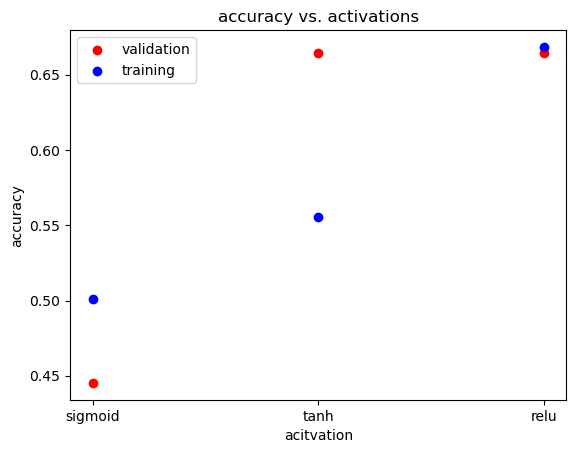

In [52]:
activations = ['sigmoid','tanh','relu']

plt.scatter(activations,val_1,color='r',label='validation',)
plt.scatter(activations,train_1,color='b',label='training',)
plt.legend()
plt.title('accuracy vs. activations')
plt.xlabel('acitvation')
plt.ylabel('accuracy')Signm

In [245]:
#Test different shape of neural network
#Test two layers with shape 200,40
nn_Relu_2 = MLPClassifier(hidden_layer_sizes=(200,40), activation='relu',random_state=42,max_iter=1000)
#fit Relu activation
nn_Relu_2.fit(X_train, y_train)
#Find the training and validation recall on all three of these
print("** 3 Layer RELU activation")
print("training")
y_hat_relu_2_T = nn_Relu_2.predict(X_train)
score = accuracy_score(y_train,y_hat_relu_2_T)
print(score)
print("validation")
y_hat_relu_2_V = nn_Relu_2.predict(X_val)
score = accuracy_score(y_val,y_hat_relu_2_V)
print(score)


** 1 Layer RELU activation
training
0.8463687150837989
validation
0.7883597883597884


In [289]:
#Test different shape of neural network
#Test three layers with shape 500,100,50
nn_Relu_3 = MLPClassifier(hidden_layer_sizes=(500,100,50), activation='relu',random_state=42,max_iter=1000)
#fit Relu activation
nn_Relu_3.fit(X_train, y_train)
#Find the training and validation recall on all three of these
print("** 3 Layer RELU activation")
print("training")
y_hat_relu_3_T = nn_Relu_3.predict(X_train)
score = accuracy_score(y_train,y_hat_relu_3_T)
print(score)
print("validation")
y_hat_relu_3_V = nn_Relu_3.predict(X_val)
score = accuracy_score(y_val,y_hat_relu_3_V)
print(score)

** 3 Layer RELU activation
training
0.8870710295291301
validation
0.8306878306878307


In [290]:
#Test different shape of neural network
#Test three layers with shape 500,100,50
nn_Relu_4 = MLPClassifier(hidden_layer_sizes=(500,200,100,30), activation='relu',random_state=42,max_iter=1000)
#fit Relu activation
nn_Relu_4.fit(X_train, y_train)
#Find the training and validation recall on all three of these
print("** 4 Layer RELU activation")
print("training")
y_hat_relu_4_T = nn_Relu_4.predict(X_train)
score = accuracy_score(y_train,y_hat_relu_4_T)
print(score)
print("validation")
y_hat_relu_4_V = nn_Relu_4.predict(X_val)
score = accuracy_score(y_val,y_hat_relu_4_V)
print(score)

** 4 Layer RELU activation
training
0.9050279329608939
validation
0.8412698412698413


In [65]:
#train regulization strength: alpha
# 4 hidden layers
alpha_score_train = []
alpha_score_vali = []
NN_weights = []
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,75,100]
for a in alpha_s:
    nn_Relu_4 = MLPClassifier(hidden_layer_sizes=(500,200,100,30), alpha = a, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
    nn_Relu_4.fit(X_train, y_train)
    #Find the training and validation recall on all three of these
    print("** alpha =",a)
    print("training")
    y_hat_relu_4_T = nn_Relu_4.predict(X_train)
    score = accuracy_score(y_train,y_hat_relu_4_T)
    alpha_score_train.append(score)
    print(score)
    print("validation")
    y_hat_relu_4_V = nn_Relu_4.predict(X_val)
    score = accuracy_score(y_val,y_hat_relu_4_V)
    alpha_score_vali.append(score)
    print(score)
    NN_weights.append(nn_Relu_4.coefs_)

** alpha = 0.0001
training
0.7879955947136564
validation
0.7153284671532847
** alpha = 0.0005
training
0.751101321585903
validation
0.6642335766423357
** alpha = 0.001
training
0.7912995594713657
validation
0.7226277372262774
** alpha = 0.005
training
0.822136563876652
validation
0.7518248175182481
** alpha = 0.01
training
0.7935022026431718
validation
0.7299270072992701
** alpha = 0.05
training
0.7797356828193832
validation
0.6934306569343066
** alpha = 0.1
training
0.7599118942731278
validation
0.708029197080292
** alpha = 1
training
0.5401982378854625
validation
0.5474452554744526
** alpha = 5
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 10
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 20
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 75
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 100
training
0.22852422907488987
validation
0.25547445255474455


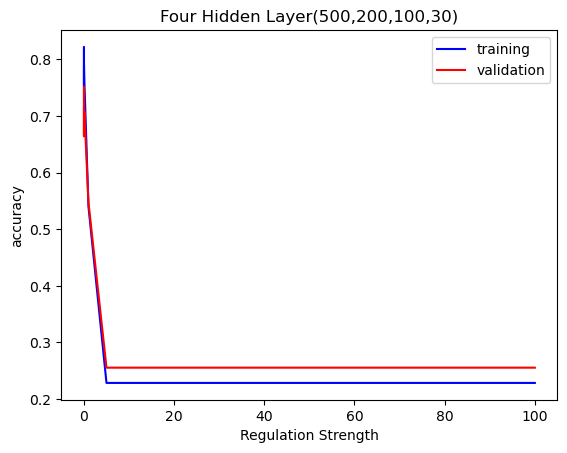

In [66]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot( alpha_s,alpha_score_train, label = "training",color ='b')
plt.plot(alpha_s,alpha_score_vali, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title('Four Hidden Layer(500,200,100,30)')
plt.show()

In [63]:
#train regulization strength: alpha
#3 hidden layers
alpha_score_train = []
alpha_score_vali = []
NN_weights = []
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,75,100]
for a in alpha_s:
    nn_Relu_3 = MLPClassifier(hidden_layer_sizes=(500,100,50), alpha = a, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
    nn_Relu_3.fit(X_train, y_train)
    #Find the training and validation recall on all three of these
    print("** alpha =",a)
    print("training")
    y_hat_relu_3_T = nn_Relu_3.predict(X_train)
    score = accuracy_score(y_train,y_hat_relu_3_T)
    alpha_score_train.append(score)
    print(score)
    print("validation")
    y_hat_relu_3_V = nn_Relu_3.predict(X_val)
    score = accuracy_score(y_val,y_hat_relu_3_V)
    alpha_score_vali.append(score)
    print(score)
    NN_weights.append(nn_Relu_3.coefs_)

** alpha = 0.0001
training
0.8023127753303965
validation
0.708029197080292
** alpha = 0.0005
training
0.8111233480176211
validation
0.7299270072992701
** alpha = 0.001
training
0.7516519823788547
validation
0.708029197080292
** alpha = 0.005
training
0.8182819383259912
validation
0.7372262773722628
** alpha = 0.01
training
0.7692731277533039
validation
0.7299270072992701
** alpha = 0.05
training
0.7890969162995595
validation
0.7372262773722628
** alpha = 0.1
training
0.6657488986784141
validation
0.656934306569343
** alpha = 1
training
0.5247797356828194
validation
0.5109489051094891
** alpha = 5
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 10
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 20
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 75
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 100
training
0.22852422907488987
validation
0.25547445255474455


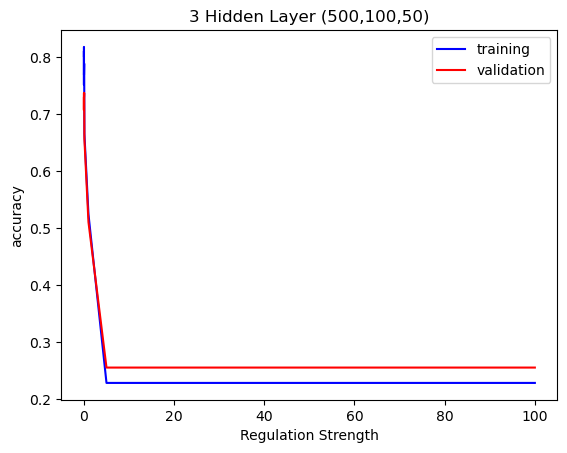

In [64]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot( alpha_s,alpha_score_train, label = "training",color ='b')
plt.plot(alpha_s,alpha_score_vali, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title('3 Hidden Layer (500,100,50)')
plt.show()

In [67]:
#train regulization strength: alpha
# 2 hidden layers
alpha_score_train = []
alpha_score_vali = []
NN_weights = []
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,75,100]
for a in alpha_s:
    nn_Relu_2 = MLPClassifier(hidden_layer_sizes=(200,40), alpha = a, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
    nn_Relu_2.fit(X_train, y_train)
    #Find the training and validation recall on all three of these
    print("** alpha =",a)
    print("training")
    y_hat_relu_2_T = nn_Relu_2.predict(X_train)
    score = accuracy_score(y_train,y_hat_relu_2_T)
    alpha_score_train.append(score)
    print(score)
    print("validation")
    y_hat_relu_2_V = nn_Relu_2.predict(X_val)
    score = accuracy_score(y_val,y_hat_relu_2_V)
    alpha_score_vali.append(score)
    print(score)
    NN_weights.append(nn_Relu_2.coefs_)

** alpha = 0.0001
training
0.7411894273127754
validation
0.7007299270072993
** alpha = 0.0005
training
0.7131057268722467
validation
0.6715328467153284
** alpha = 0.001
training
0.7208149779735683
validation
0.6861313868613139
** alpha = 0.005
training
0.7505506607929515
validation
0.6788321167883211
** alpha = 0.01
training
0.7202643171806168
validation
0.6788321167883211
** alpha = 0.05
training
0.6668502202643172
validation
0.6277372262773723
** alpha = 0.1
training
0.6751101321585903
validation
0.6715328467153284
** alpha = 1
training
0.5247797356828194
validation
0.5182481751824818
** alpha = 5
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 10
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 20
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 75
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 100
training
0.22852422907488987
validation
0.25547445255474455


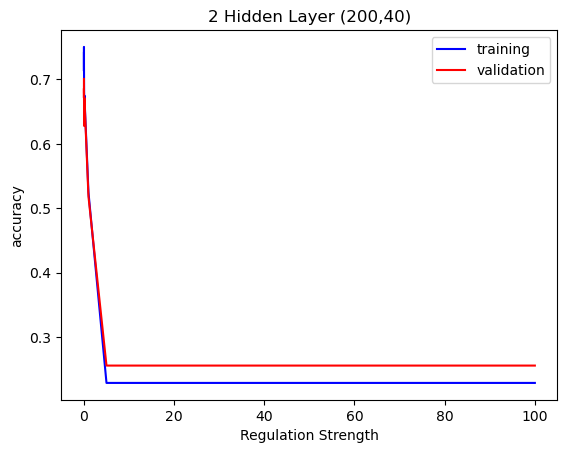

In [68]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot( alpha_s,alpha_score_train, label = "training",color ='b')
plt.plot(alpha_s,alpha_score_vali, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title('2 Hidden Layer (200,40)')
plt.show()

In [69]:
#train regulization strength: alpha
# 1 hidden layer
alpha_score_train = []
alpha_score_vali = []
NN_weights = []
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,75,100]
for a in alpha_s:
    nn_Relu_1 = MLPClassifier(hidden_layer_sizes=(300,), alpha = a, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
    nn_Relu_1.fit(X_train, y_train)
    #Find the training and validation recall on all three of these
    print("** alpha =",a)
    print("training")
    y_hat_relu_1_T = nn_Relu_1.predict(X_train)
    score = accuracy_score(y_train,y_hat_relu_1_T)
    alpha_score_train.append(score)
    print(score)
    print("validation")
    y_hat_relu_1_V = nn_Relu_1.predict(X_val)
    score = accuracy_score(y_val,y_hat_relu_1_V)
    alpha_score_vali.append(score)
    print(score)
    NN_weights.append(nn_Relu_1.coefs_)

** alpha = 0.0001
training
0.6685022026431718
validation
0.6642335766423357
** alpha = 0.0005
training
0.677863436123348
validation
0.656934306569343
** alpha = 0.001
training
0.7070484581497798
validation
0.6934306569343066
** alpha = 0.005
training
0.7009911894273128
validation
0.6788321167883211
** alpha = 0.01
training
0.670704845814978
validation
0.656934306569343
** alpha = 0.05
training
0.6536343612334802
validation
0.6277372262773723
** alpha = 0.1
training
0.6051762114537445
validation
0.5182481751824818
** alpha = 1
training
0.5082599118942731
validation
0.40875912408759124
** alpha = 5
training
0.2813876651982379
validation
0.2773722627737226
** alpha = 10
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 20
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 75
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 100
training
0.22852422907488987
validation
0.25547445255474455


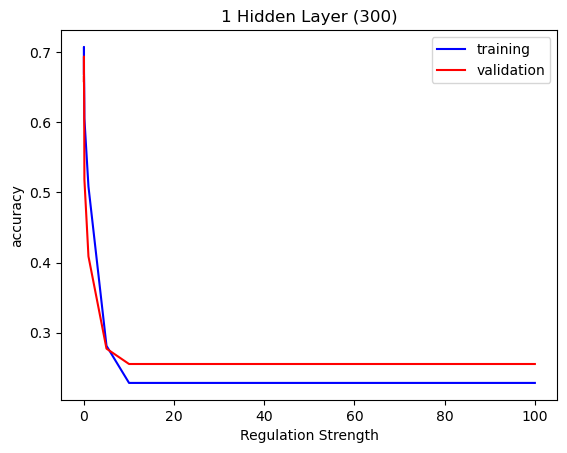

In [70]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot( alpha_s,alpha_score_train, label = "training",color ='b')
plt.plot(alpha_s,alpha_score_vali, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title('1 Hidden Layer (300)')
plt.show()

In [73]:
#train regulization strength: alpha
# 5 hidden layer
alpha_score_train = []
alpha_score_vali = []
NN_weights = []
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,75,100]
for a in alpha_s:
    nn_Relu_5 = MLPClassifier(hidden_layer_sizes=(500,250,125,70,35), alpha = a, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
    nn_Relu_5.fit(X_train, y_train)
    #Find the training and validation recall on all three of these
    print("** alpha =",a)
    print("training")
    y_hat_relu_5_T = nn_Relu_5.predict(X_train)
    score = accuracy_score(y_train,y_hat_relu_5_T)
    alpha_score_train.append(score)
    print(score)
    print("validation")
    y_hat_relu_5_V = nn_Relu_5.predict(X_val)
    score = accuracy_score(y_val,y_hat_relu_5_V)
    alpha_score_vali.append(score)
    print(score)
    NN_weights.append(nn_Relu_5.coefs_)

** alpha = 0.0001
training
0.7951541850220264
validation
0.7445255474452555
** alpha = 0.0005
training
0.7868942731277533
validation
0.708029197080292
** alpha = 0.001
training
0.7681718061674009
validation
0.7007299270072993
** alpha = 0.005
training
0.7907488986784141
validation
0.708029197080292
** alpha = 0.01
training
0.7588105726872246
validation
0.6934306569343066
** alpha = 0.05
training
0.6310572687224669
validation
0.6058394160583942
** alpha = 0.1
training
0.6475770925110133
validation
0.6058394160583942
** alpha = 1
training
0.5275330396475771
validation
0.5401459854014599
** alpha = 5
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 10
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 20
training
0.21585903083700442
validation
0.22627737226277372
** alpha = 75
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 100
training
0.22852422907488987
validation
0.25547445255474455


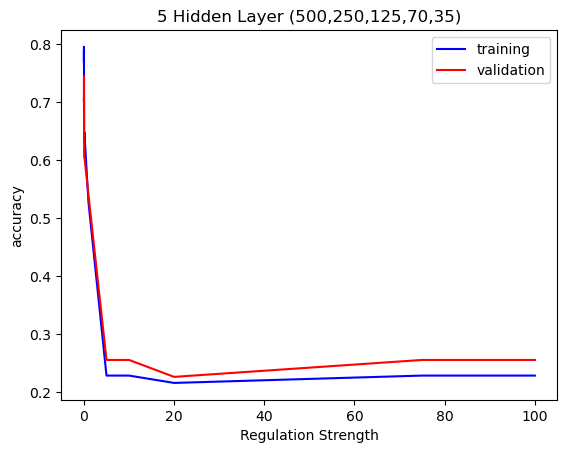

In [74]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot( alpha_s,alpha_score_train, label = "training",color ='b')
plt.plot(alpha_s,alpha_score_vali, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title('5 Hidden Layer (500,250,125,70,35)')
plt.show()

In [75]:
#train regulization strength: alpha
# 7 hidden layer
alpha_score_train = []
alpha_score_vali = []
NN_weights = []
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,75,100]
for a in alpha_s:
    nn_Relu_7 = MLPClassifier(hidden_layer_sizes=(700,500,300,200,150,100,50) , alpha = a, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
    nn_Relu_7.fit(X_train, y_train)
    #Find the training and validation recall on all three of these
    print("** alpha =",a)
    print("training")
    y_hat_relu_7_T = nn_Relu_7.predict(X_train)
    score = accuracy_score(y_train,y_hat_relu_7_T)
    alpha_score_train.append(score)
    print(score)
    print("validation")
    y_hat_relu_7_V = nn_Relu_7.predict(X_val)
    score = accuracy_score(y_val,y_hat_relu_7_V)
    alpha_score_vali.append(score)
    print(score)
    NN_weights.append(nn_Relu_7.coefs_)

** alpha = 0.0001
training
0.788546255506608
validation
0.7153284671532847
** alpha = 0.0005
training
0.7725770925110133
validation
0.6861313868613139
** alpha = 0.001
training
0.7571585903083701
validation
0.7445255474452555
** alpha = 0.005
training
0.8177312775330396
validation
0.7299270072992701
** alpha = 0.01
training
0.7329295154185022
validation
0.6788321167883211
** alpha = 0.05
training
0.776431718061674
validation
0.7153284671532847
** alpha = 0.1
training
0.7048458149779736
validation
0.6496350364963503
** alpha = 1
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 5
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 10
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 20
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 75
training
0.22852422907488987
validation
0.25547445255474455
** alpha = 100
training
0.22852422907488987
validation
0.25547445255474455


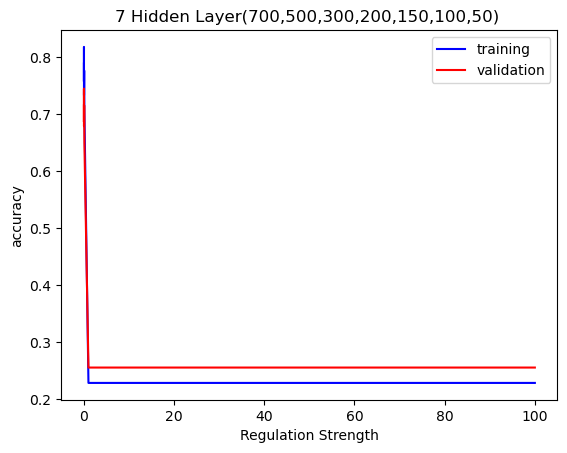

In [76]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot( alpha_s,alpha_score_train, label = "training",color ='b')
plt.plot(alpha_s,alpha_score_vali, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title('7 Hidden Layer(700,500,300,200,150,100,50) ')
plt.show()

In [83]:
# Final result
nn_Relu_4_final = MLPClassifier(hidden_layer_sizes=(500,200,100,30), alpha = 0.005, activation='relu',random_state=42,max_iter=1000)
    #fit Relu activation
nn_Relu_4_final.fit(X_train, y_train)

MLPClassifier(alpha=0.005, hidden_layer_sizes=(500, 200, 100, 30),
              max_iter=1000, random_state=42)

In [84]:
#final score
y_final_hat = nn_Relu_4_final.predict(X_test)
final_score = accuracy_score(y_test,y_final_hat)
print(final_score)

0.7837837837837838
